___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [83]:
import numpy as np
import pandas as pd

# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [84]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")
df_male = pd.read_csv("ANSUR II MALE Public.csv")

## Explore Data

In [85]:
df_male.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081
subjectid,10027,10032,10033,10092,10093,10115,10117,10237,10242,10244,10246,10260,10265,10272,10286,10293,10303,10304,10305,10310,10312,10319,10338,10339,10340,10341,10349,10354,10358,10361,10367,10368,10371,10385,10389,10404,10406,10419,10422,10423,10427,10447,10451,10460,10467,10471,10473,10482,10495,10497,10510,10515,10517,10523,10524,10525,10529,10533,10534,10553,10557,10558,10564,10577,10579,10581,10582,10586,10587,10597,10599,10601,10614,10615,10616,10621,10622,10624,10631,10632,10638,10639,10646,10648,10652,10662,10667,10670,10672,10674,10677,10679,10680,10687,10689,10692,10694,10695,10696,10701,...,29228,29229,29230,29231,29232,29233,29234,29238,29239,29240,29242,29244,29245,29247,29248,29249,29250,29251,29252,29253,29254,29255,29257,29258,29259,29260,29261,29262,29264,29265,29266,29269,29270,29272,29275,29278,29279,29282,29300,29302,29305,29306,29308,29311,29312,29314,29316,29317,29318,29320,29321,29322,29323,29325,29326,29329,29330,29332,29339,29340,29341,29342,29344,29346,29347,29349,29350,29351,29353,29355,29357,29359,29361,29365,29411,29413,29414,29415,29417,29420,29421,29423,29424,29426,29428,29429,29430,29431,29432,29433,29434,29437,29439,29440,29441,29442,29443,29447,29451,29452
abdominalextensiondepthsitting,266,233,287,234,250,263,314,304,321,227,272,227,268,288,261,308,245,310,225,270,209,245,258,219,286,250,321,247,240,268,193,294,245,261,230,301,261,339,204,285,212,322,219,273,305,204,229,275,279,304,308,246,268,289,247,451,212,271,311,281,214,251,223,254,320,230,272,313,202,228,231,218,287,232,322,328,296,260,223,267,275,225,287,237,258,243,265,274,198,249,255,279,230,202,218,209,245,295,226,300,...,252,228,245,208,259,197,216,220,234,232,292,225,246,241,246,265,268,226,241,211,233,239,264,236,263,246,273,262,252,262,275,201,222,333,226,248,193,214,237,215,282,200,223,210,250,364,227,245,227,296,240,217,258,204,190,266,288,219,287,276,230,255,279,265,244,243,274,282,222,266,205,237,266,233,278,240,190,205,261,287,238,223,230,203,195,269,187,220,200,232,210,224,208,295,240,235,247,264,203,327
acromialheight,1467,1395,1430,1347,1585,1407,1476,1529,1457,1481,1450,1416,1504,1539,1379,1460,1384,1455,1427,1468,1450,1370,1340,1624,1423,1326,1486,1469,1425,1480,1538,1429,1363,1543,1432,1483,1386,1544,1412,1430,1438,1374,1502,1414,1440,1328,1413,1406,1531,1364,1457,1533,1370,1434,1385,1525,1496,1426,1433,1529,1310,1396,1491,1378,1434,1410,1356,1524,1416,1320,1442,1384,1296,1379,1514,1418,1383,1446,1458,1472,1432,1392,1524,1446,1410,1252,1417,1453,1414,1380,1429,1440,1446,1476,1486,1466,1349,1403,1429,1433,...,1473,1489,1583,1457,1456,1491,1434,1456,1480,1534,1510,1486,1568,1369,1502,1383,1488,1358,1400,1469,1469,1535,1376,1301,1394,1574,1494,1388,1469,1468,1482,1482,1391,1539,1565,1428,1370,1421,1387,1486,1387,1392,1376,1364,1449,1507,1431,1351,1476,1479,1447,1322,1410,1392,1330,1414,1392,1346,1471,1476,1383,1490,1442,1361,1391,1334,1417,1353,1442,1460,1399,1491,1467,1510,1396,1374,1413,1462,1353,1472,1578,1493,1415,1347,1338,1441,1425,1404,1467,1272,1377,1386,1500,1434,1458,1353,1473,1394,1417,1523
acromionradialelength,337,326,341,310,372,344,343,360,339,345,339,339,373,365,327,361,329,346,331,349,340,309,314,388,341,299,343,335,351

In [86]:
df_female.head().T

,0,1,2,3,4
SubjectId,10037,10038,10042,10043,10051
abdominalextensiondepthsitting,231,194,183,261,309
acromialheight,1282,1379,1369,1356,1303
acromionradialelength,301,320,329,306,308
anklecircumference,204,207,233,214,214
axillaheight,1180,1292,1271,1250,1210
balloffootcircumference,222,225,237,240,217
balloffootlength,177,178,196,188,182
biacromialbreadth,373,372,397,384,378
bicepscircumferenceflexed,315,272,300,364,320


In [87]:
df_male.shape, df_female.shape

((4082, 108), (1986, 108))

In [88]:
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [89]:
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [90]:
df_male.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,4082.0,254.650906,37.327178,163.0,227.00,251.0,279.00,451.0
acromialheight,4082.0,1440.736894,63.287242,1194.0,1398.00,1439.0,1481.00,1683.0
acromionradialelength,4082.0,335.244488,17.482795,270.0,324.00,335.0,346.00,393.0
anklecircumference,4082.0,229.343949,14.649102,156.0,219.25,228.0,239.00,293.0
axillaheight,4082.0,1329.082068,59.516123,1106.0,1289.00,1328.0,1367.00,1553.0
balloffootcircumference,4082.0,252.017148,12.936131,186.0,243.00,252.0,261.00,306.0
balloffootlength,4082.0,200.935081,10.470947,156.0,194.00,201.0,208.00,245.0
biacromialbreadth,4082.0,415.675649,19.161654,337.0,403.00,415.0,428.00,489.0
bicepscircumferenceflexed,4082.0,358.135718,34.618093,246.0,335.00,357.0,380.00,490.0


In [91]:
df_female.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,1986.0,229.651057,31.464691,155.0,207.00,227.0,249.00,358.0
acromialheight,1986.0,1335.095166,58.079885,1115.0,1298.00,1332.0,1374.00,1536.0
acromionradialelength,1986.0,311.198389,17.164691,249.0,300.00,311.0,323.00,371.0
anklecircumference,1986.0,215.739678,14.891757,170.0,205.00,215.0,225.00,275.0
axillaheight,1986.0,1239.029708,55.801958,1038.0,1202.00,1236.0,1277.00,1419.0
balloffootcircumference,1986.0,228.110272,11.771007,194.0,220.00,227.0,236.00,270.0
balloffootlength,1986.0,182.051360,9.641920,151.0,175.00,182.0,188.00,216.0
biacromialbreadth,1986.0,365.348943,18.298851,283.0,353.00,365.0,378.00,422.0
bicepscircumferenceflexed,1986.0,305.578550,30.757033,216.0,285.00,304.0,324.00,435.0


In [92]:
df = pd.concat([df_female, df_male])

In [93]:
df.shape

(6068, 109)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 4081
Columns: 109 entries, SubjectId to subjectid
dtypes: float64(2), int64(98), object(9)
memory usage: 5.1+ MB


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectId,1986.0,22306.606244,20904.730297,10037.0,17667.00,22096.5,26089.75,920103.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [96]:
df.isnull().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [97]:
df.SubjectId.value_counts(dropna=False)

NaN        4082
18134.0       1
25392.0       1
28961.0       1
27212.0       1
           ... 
27840.0       1
25686.0       1
28747.0       1
23956.0       1
13297.0       1
Name: SubjectId, Length: 1987, dtype: int64

In [98]:
df.subjectid.value_counts(dropna=False)

NaN        1986
10638.0       1
14659.0       1
27710.0       1
27051.0       1
           ... 
28348.0       1
15181.0       1
28385.0       1
27874.0       1
16405.0       1
Name: subjectid, Length: 4083, dtype: int64

In [99]:
NaN_list =[]
for columns in df.columns:
    if df[columns].isnull().sum()>0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)

SubjectId = 4082
Ethnicity = 4647
subjectid = 1986


In [100]:
NaN_list

['SubjectId', 'Ethnicity', 'subjectid']

In [101]:
df= df.drop(NaN_list, axis=1)

In [102]:
df.isnull().sum().any()

False

In [103]:
df.duplicated().sum()

0

In [104]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=106)

In [105]:
df.shape

(6068, 106)

### Now, the second thing that caught my eye in the Dataset is; "SubjectNumericRace" and "DODRace" column

**SubjectNumericRace**: a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

**DODRace**: Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [106]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,2,2
1,3,3
2,1,1
3,2,8
4,1,1
...,...,...
4077,1,51
4078,1,1
4079,1,1
4080,1,1


__I've decided to drop subjectnumericrace column.__

In [107]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [108]:
df.shape

(6068, 105)

### There was an instruction above:

__Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)__

In [109]:
df.DODRace.value_counts(dropna=False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [110]:
df = df[df["DODRace"].isin([1,2,3])]

In [111]:
df.DODRace.value_counts(dropna = False)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [112]:
df.shape

(5769, 105)

1    3792
2    1298
3     679
Name: DODRace, dtype: int64


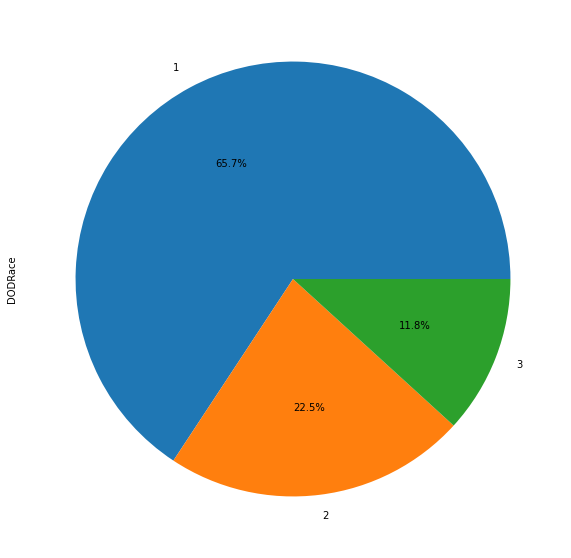

In [113]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [114]:
df.DODRace.unique()

array([2, 3, 1], dtype=int64)

In [115]:
df["DODRace"] = df.DODRace.map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})

In [116]:
df.DODRace.value_counts() 

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [117]:
# data = data[data["DODRace"].isin([1,2,3])]
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,Black,26,61,142,Right hand
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Hispanic,21,64,120,Right hand
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,White,23,68,147,Right hand
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Black,22,66,175,Right hand
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63,448,499,964,635,428,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810

In [118]:
# we don't need this columns 

In [119]:
drop_feature = ["Date", "Installation", "Component","PrimaryMOS"]

In [120]:
df.drop(drop_feature, axis=1, inplace=True)

In [121]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristcircumference', 'wristheight', 'Gender', 'Branch',
       'SubjectsBirthLocation', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=101)

In [122]:
df.shape

(5769, 101)

<AxesSubplot:>

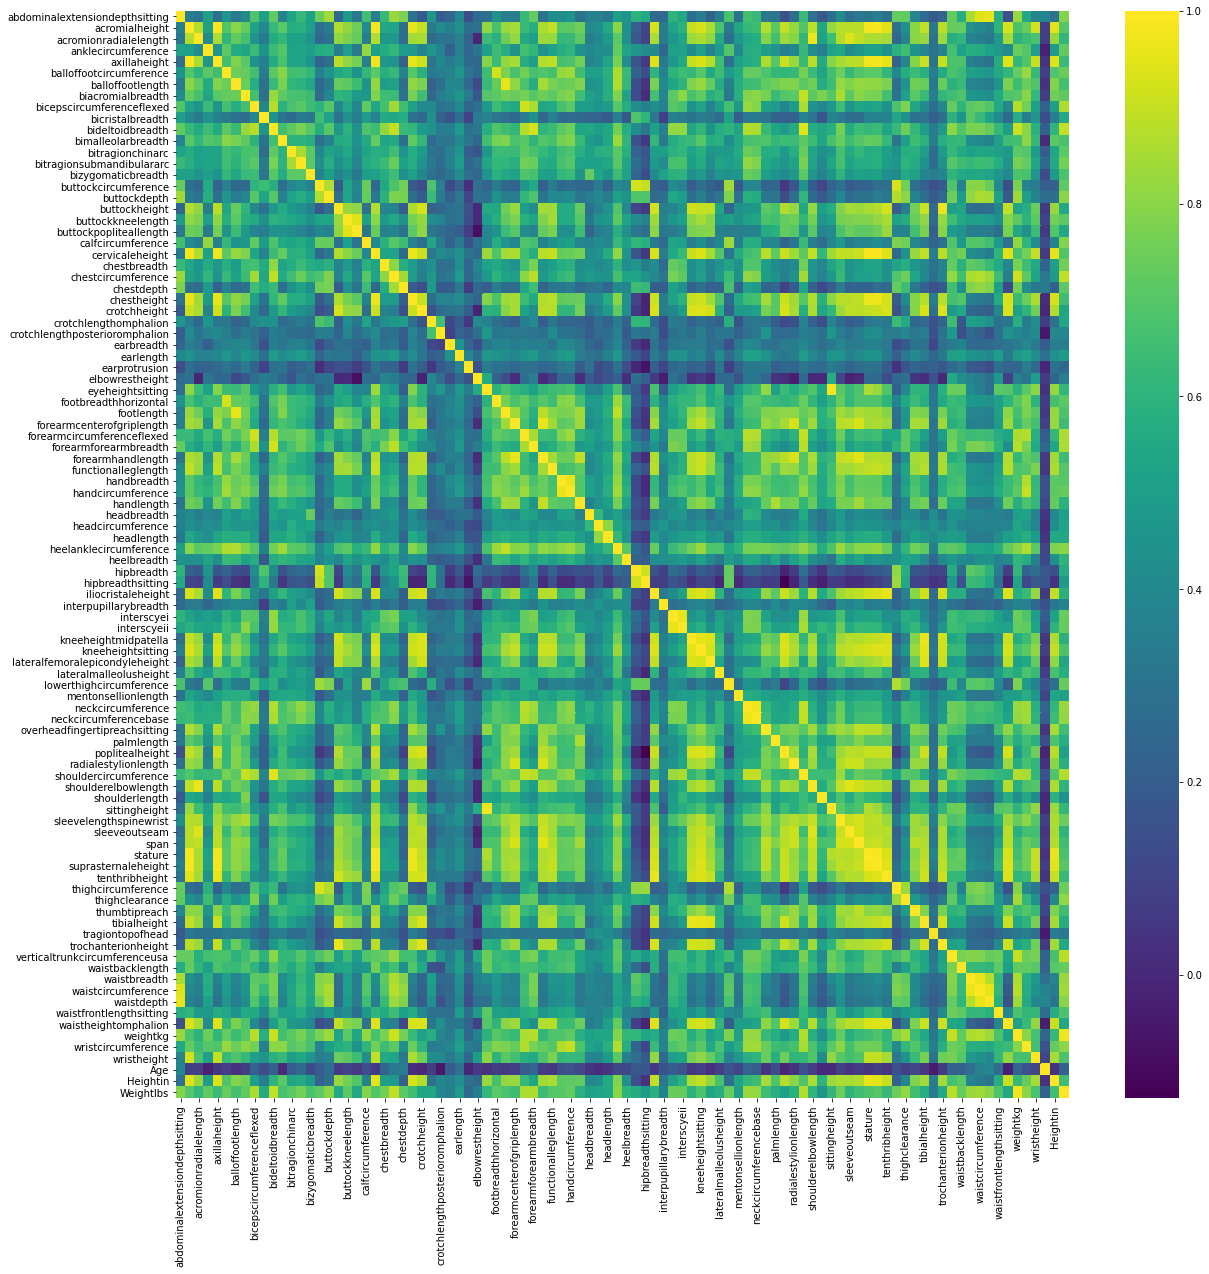

In [123]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="viridis")

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [70]:
from sklearn.model_selection import train_test_split

In [131]:
X = df.drop("DODRace",axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify =y)

In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [134]:
scaler = MinMaxScaler()

In [135]:
scaler.fit(X_train)

MinMaxScaler()

In [136]:
X_train_scaled = scaler.transform(X_train)

In [137]:
X_test_scaled = scaler.transform(X_test)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [138]:
from sklearn.linear_model import LogisticRegression

In [142]:
log_model = LogisticRegression(class_weight = "balanced", random_state= 42, max_iter=10000)

In [143]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [145]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [152]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [153]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [154]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  13   8]
 [ 14 102  20]
 [ 10  99 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.75      0.58       136
       White       0.96      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   35   30]
 [  16  457   70]
 [  71  359 2604]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



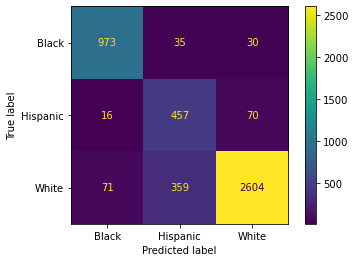

In [155]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

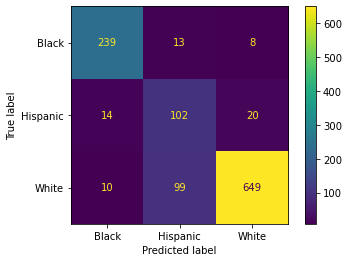

In [156]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

### Logistic Model GridsearchCV

In [157]:
from sklearn.model_selection import GridSearchCV

In [160]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [161]:
log_grid_model.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
log_grid_model.best_params_  

In [ ]:
eval_metric(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

### Vanilla SVC model 

###  SVC Model GridsearchCV

## 3. RF

### Vanilla RF Model

### RF Model GridsearchCV

## 4. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___